# Grupamento 1 - Checando e tratando base de dados

In [1]:
#mini projeto 2 deliverable.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Verificando informações da base:

In [3]:
dados = pd.read_csv('/content/Walmart.csv')
dados.info() #dados info para verificar a integridade e formação dos dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
dados 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
dados['Date'] = pd.to_datetime(dados['Date']) #como dados está em formato de object, para facilitar futuras edições, converto para data.
dados['Date'] #convertido para datetime

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [6]:
dados.value_counts('Store').sort_values() #verificando quantidade de lojas.
# aqui verifico que cada loja aparece 143 vezes, pois são 143 semanas em 3 anos.
# logo, tenho os dados de todas as semanas individualmente, possibilitando analisar alguns blocos.

Store
1     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
2     143
21    143
23    143
44    143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
25    143
45    143
dtype: int64

In [7]:
dados['Temp Celsius'] = ((dados['Temperature'] - 32) * 5) / 9
# dados = dados.drop(columns=['C'])
# criei a coluna convertendo temperatura para Celsius para facilitar compreensão.

In [8]:
dados

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5.727778
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3.616667
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4.405556
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8.127778
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,8.055556
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,18.266667
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,18.272222
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12.483333
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,13.594444


In [9]:
p_loja = dados.sort_values('Date') # vendas por data.
p_mes = dados.sort_values('Date')
p_ano = dados.sort_values('Date')
p_loja.head(2)
# crio algumas váriaveis para fazer algumas alterações individuais, sem alterar a base principal de dados.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,21.722222
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,15.383333


In [10]:
p_ano.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,21.722222
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,15.383333


In [11]:
# agrupar por loja, somando vendas, tentar agrupar por data - semana, mês ou ano.
# posso tentar agrupar por loja, excluindo ano e dia, somando as vendas por meses.

In [12]:
p_loja.sort_values('Store') # as vendas por loja, em ordem de data.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
39,1,2010-05-11,1551659.28,0,58.74,2.689,211.956394,7.838,14.855556
91,1,2011-04-11,1697229.58,0,54.98,3.332,217.837382,7.866,12.766667
62,1,2011-04-15,1559889.00,0,71.27,3.743,215.291856,7.682,21.816667
63,1,2011-04-22,1564819.81,0,72.99,3.807,215.459905,7.682,22.772222
120,1,2012-05-25,1555444.55,0,77.22,3.561,221.744944,7.143,25.122222
...,...,...,...,...,...,...,...,...,...
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,13.594444
6367,45,2011-07-15,748435.20,0,78.47,3.760,186.139981,8.625,25.816667
6308,45,2010-05-28,801098.43,0,69.27,2.899,182.046418,8.899,20.705556
6402,45,2012-03-16,788340.23,0,50.56,3.862,190.461896,8.424,10.311111


In [13]:
p_mes['Date'] = p_mes['Date'].dt.month # deixando somente o mês para comparar valores mensais somados de todos os anos.

In [14]:
p_mes

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
606,5,1,283178.12,0,71.10,2.603,212.226946,6.768,21.722222
2036,15,1,566945.95,0,59.69,2.840,132.756800,8.067,15.383333
5897,42,1,481523.93,0,86.01,3.001,126.234600,9.003,30.005556
4610,33,1,224294.39,0,91.45,3.001,126.234600,9.265,33.027778
5039,36,1,422169.47,0,74.66,2.567,210.440443,8.476,23.700000
...,...,...,...,...,...,...,...,...,...
5860,41,12,1409544.97,0,39.38,3.760,199.053937,6.195,4.100000
2285,16,12,491817.19,0,43.26,3.760,199.053937,5.847,6.255556
1427,10,12,1713889.11,0,76.03,4.468,131.108333,6.943,24.461111
3572,25,12,697317.41,0,43.74,4.000,216.115057,7.293,6.522222


In [15]:
#aqui verifico qual loja mais lucrou somando todos os anos.
vis = p_mes.groupby(['Store'])['Weekly_Sales'].agg('sum').reset_index()
vis = pd.DataFrame(vis)
vis.head()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


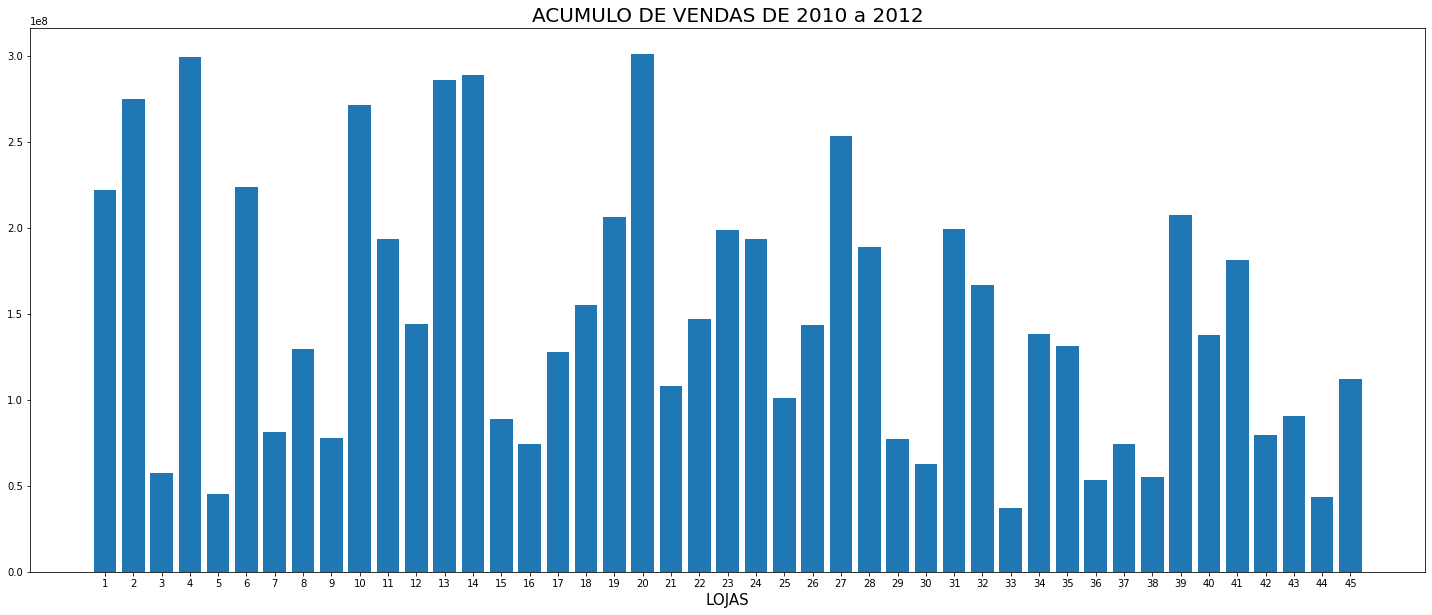

In [16]:
plt.figure(figsize=(25,10))
x = vis['Store']
y = vis['Weekly_Sales']
plt.bar(x, y)
plt.xticks(np.arange(1,46))
plt.title('ACUMULO DE VENDAS DE 2010 a 2012', size=20)
plt.xlabel('LOJAS',size=15)
plt.show()

In [17]:
#acima percebo que as lojas que mais venderam nestes anos foram as lojas 4 e 20.
#Ao longo das análises, verificarei e compararei agora suas caracteristicas principais.

In [18]:
# NESTE MOMENTO IREI VERIFICAR OS ACUMULOS ANUAIS.

In [19]:
p_ano['Date'] = p_ano['Date'].dt.year
p_ano.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
606,5,2010,283178.12,0,71.10,2.603,212.226946,6.768,21.722222
2036,15,2010,566945.95,0,59.69,2.840,132.756800,8.067,15.383333
5897,42,2010,481523.93,0,86.01,3.001,126.234600,9.003,30.005556
4610,33,2010,224294.39,0,91.45,3.001,126.234600,9.265,33.027778
5039,36,2010,422169.47,0,74.66,2.567,210.440443,8.476,23.700000


In [20]:
vis_a = p_ano.groupby(['Store','Date'])['Weekly_Sales'].agg('sum').reset_index()
vis_a.head()

,Store,Date,Weekly_Sales
0,1,2010,73278832.00
1,1,2011,80921918.83
2,1,2012,68202058.02
3,2,2010,95277864.19
4,2,2011,98607881.42


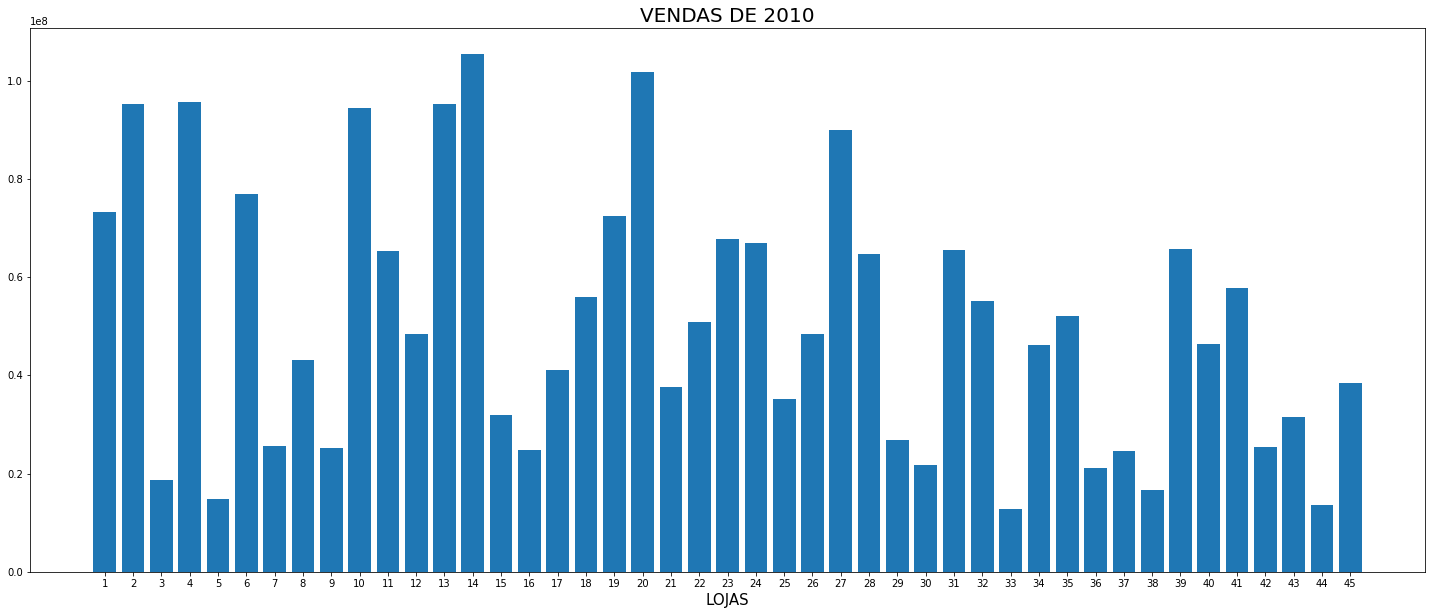

In [77]:
dois_dez = vis_a[(vis_a['Date'] == 2010)]

plt.figure(figsize=(25,10))
x = dois_dez['Store']
y = dois_dez['Weekly_Sales']
plt.bar(x, y)
plt.xticks(np.arange(1,46))
plt.title('VENDAS DE 2010', size=20)
plt.xlabel('LOJAS',size=15)
plt.show()

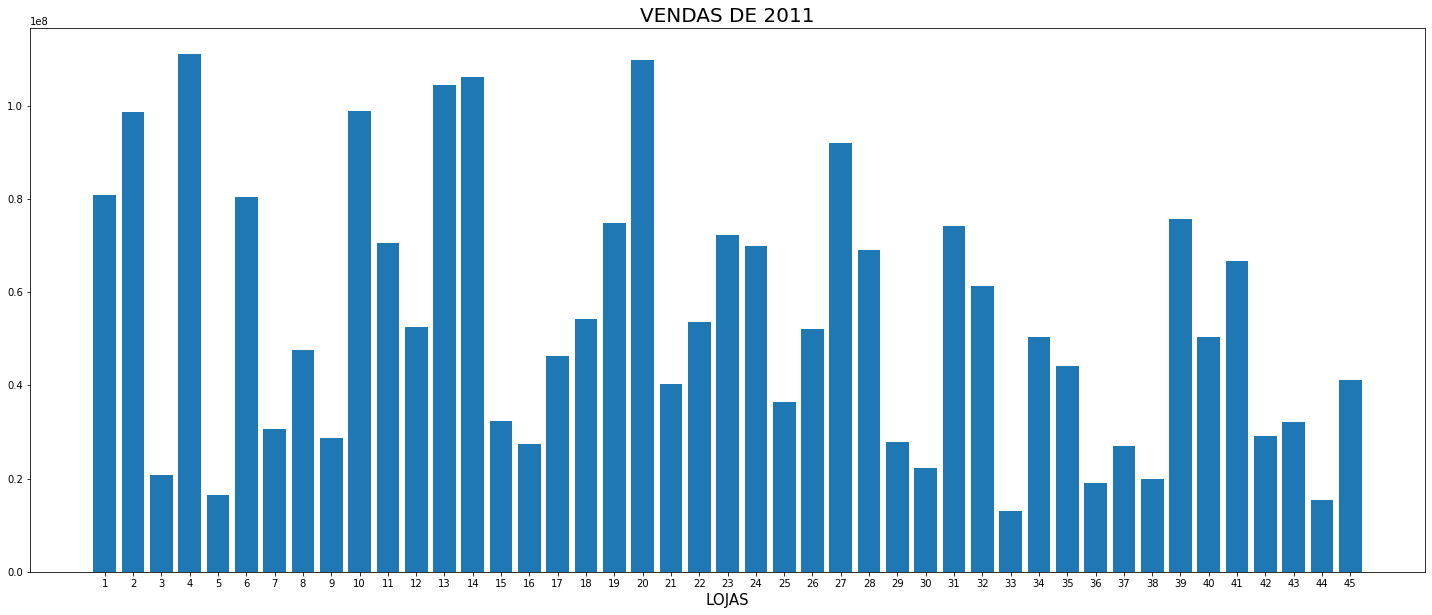

In [78]:
dois_onze = vis_a[(vis_a['Date'] == 2011)]

plt.figure(figsize=(25,10))
x = dois_onze['Store']
y = dois_onze['Weekly_Sales']
plt.bar(x, y)
plt.xticks(np.arange(1,46))
plt.title('VENDAS DE 2011', size=20)
plt.xlabel('LOJAS',size=15)
plt.show()

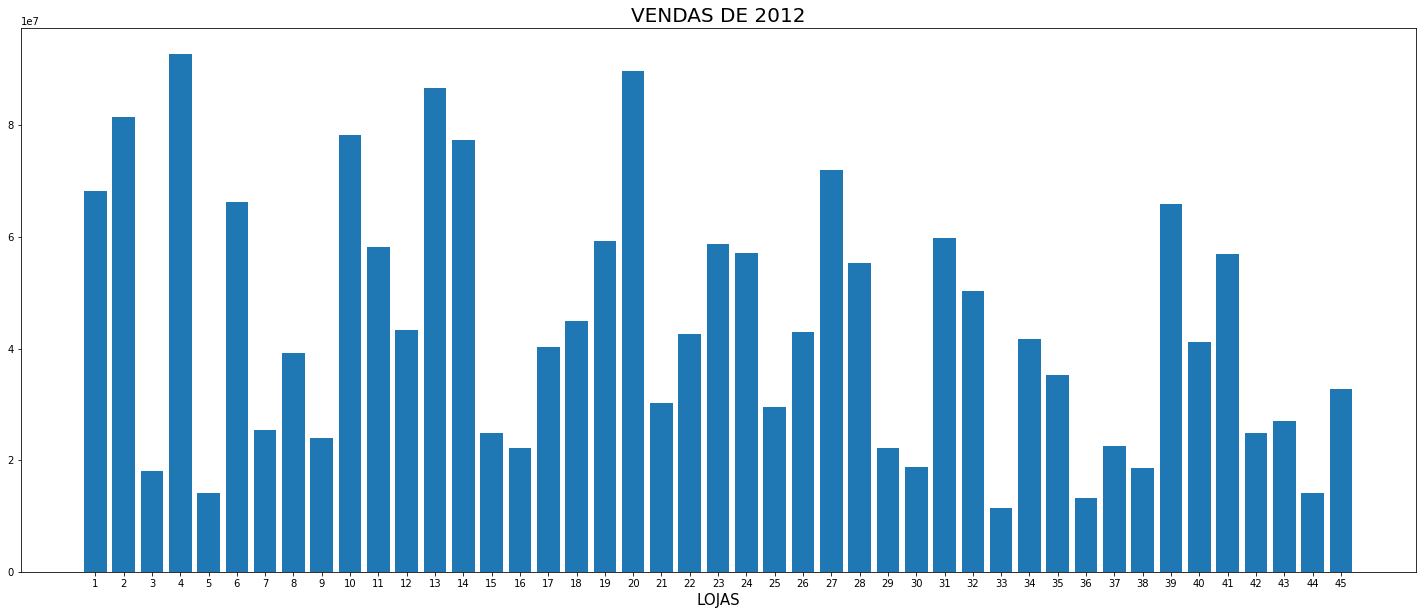

In [80]:
dois_doze = vis_a[(vis_a['Date'] == 2012)]

plt.figure(figsize=(25,10))
x = dois_doze['Store']
y = dois_doze['Weekly_Sales']
plt.bar(x, y)
plt.xticks(np.arange(1,46))
plt.title('VENDAS DE 2012', size=20)
plt.xlabel('LOJAS',size=15)
plt.show()

In [24]:
# aqui verifico que a loja 20 e a 4 são desde sempre destaques em vendas, com ênfase na 4, que nos últimos anos superou a 20, embora perca no acumulado.
# notamos também que a loja 14 era destaque e foi decaindo.
# vou analisa-las para verificar quais as possíveis causas.

# Grupamento 2 - Verificando informações das lojas principais

Loja 4 - A segunda maior em vendas acumuladas

Loja 20 - A maior em vendas acumuladas

Loja 33 - A pior em vendas acumuladas

Loja 14 - A que se destacava em vendas e ficou para trás

In [25]:
store4 = dados[(dados['Store'] == 4)]
store4 = store4.sort_values('Date')
store4['Mean_Sales'] = store4['Weekly_Sales'].mean().round()
store4.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius,Mean_Sales
463,4,2010-01-10,1842821.02,0,63.96,2.619,126.234600,7.127,17.755556,2094713.0
437,4,2010-02-04,1979247.12,0,48.77,2.740,126.603484,7.896,9.316667,2094713.0
450,4,2010-02-07,1881337.21,0,73.66,2.668,126.139200,7.372,23.144444,2094713.0
431,4,2010-02-19,2049860.26,0,36.45,2.540,126.526286,8.623,2.472222,2094713.0
432,4,2010-02-26,1925728.84,0,41.36,2.590,126.552286,8.623,5.200000,2094713.0


In [26]:
store20 = dados[(dados['Store'] == 20)]
store20 = store20.sort_values('Date')
store20['Mean_Sales'] = store20['Weekly_Sales'].mean().round()
store20.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius,Mean_Sales
2751,20,2010-01-10,1933719.21,0,61.08,2.707,204.885097,7.484,16.155556,2107677.0
2725,20,2010-02-04,2405395.22,0,51.00,2.850,204.025284,7.856,10.555556,2107677.0
2738,20,2010-02-07,2143676.77,0,70.10,2.815,204.465056,7.527,21.166667,2107677.0
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187,-3.650000,2107677.0
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187,0.177778,2107677.0


In [27]:
store33 = dados[(dados['Store'] == 33)]
store33 = store33.sort_values('Date')
store33['Mean_Sales'] = store33['Weekly_Sales'].mean().round()
store33.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius,Mean_Sales
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,33.027778,259862.0
4584,33,2010-02-04,274634.52,0,66.79,3.086,126.603484,9.849,19.327778,259862.0
4597,33,2010-02-07,267495.76,0,97.66,2.978,126.139200,9.495,36.477778,259862.0
4578,33,2010-02-19,296850.83,0,62.16,2.915,126.526286,10.115,16.755556,259862.0
4579,33,2010-02-26,284052.77,0,56.50,2.825,126.552286,10.115,13.611111,259862.0


In [28]:
store14 = dados[(dados['Store'] == 14)]
store14 = store14.sort_values('Date')
store14['Mean_Sales'] = store14['Weekly_Sales'].mean().round()
store14.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius,Mean_Sales
1893,14,2010-01-10,1855703.66,0,70.58,2.707,182.716838,8.724,21.433333,2020978.0
1867,14,2010-02-04,2495630.51,0,47.74,2.850,181.865754,8.899,8.744444,2020978.0
1880,14,2010-02-07,2334788.42,0,76.61,2.815,182.318780,8.743,24.783333,2020978.0
1861,14,2010-02-19,2204556.70,0,31.27,2.745,182.034782,8.992,-0.405556,2020978.0
1862,14,2010-02-26,2095591.63,0,34.89,2.754,182.077469,8.992,1.605556,2020978.0


#Grupamento 3 - Verificando dados individuais

## - DADOS DA STORE 4 

In [29]:
store4['Weekly_Sales'].sum()/len(store4['Weekly_Sales'])

2094712.9606993007

In [30]:
store4['Temp Celsius'].sum()/len(store4['Temp Celsius'])

16.80742035742036

In [31]:
store4['Fuel_Price'].sum()/len(store4['Fuel_Price'])

3.2169720279720284

In [32]:
store4['CPI'].sum()/len(store4['CPI'])

128.67966946083916

In [33]:
store4['Unemployment'].sum()/len(store4['Unemployment'])

5.9646923076923075

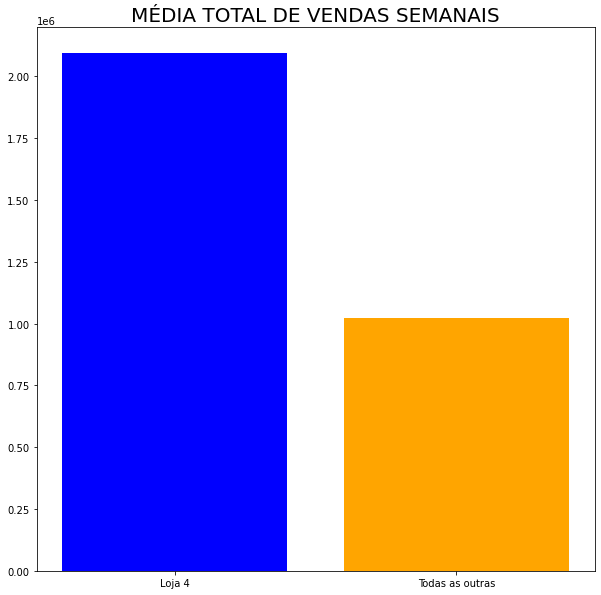

In [34]:
plt.figure(figsize=(10,10))
dados_semStore4 = dados[(dados['Store'] != 4)] # coletando os dados sem a Store 20
y = [store4['Weekly_Sales'].mean(),dados_semStore4['Weekly_Sales'].mean()]
x = ['Loja 4','Todas as outras']
cores = ['blue','orange']
plt.bar(x,y,color=cores)
plt.title('MÉDIA TOTAL DE VENDAS SEMANAIS', size = 20)
plt.show()

##- DADOS DA STORE 20 

In [35]:
print(f"{store20['Weekly_Sales'].mean().round()}, média de vendas")
print(f"{store20['Temp Celsius'].mean().round()}, média de temperatura em Celsius")
print(f"{store20['Fuel_Price'].mean().round()}, média do preço de combustível")
print(f"{store20['CPI'].mean().round()}, média de inflação")
print(f"{store20['Unemployment'].mean().round()}, média de desemprego")

2107677.0, média de vendas
13.0, média de temperatura em Celsius
3.0, média do preço de combustível
209.0, média de inflação
7.0, média de desemprego


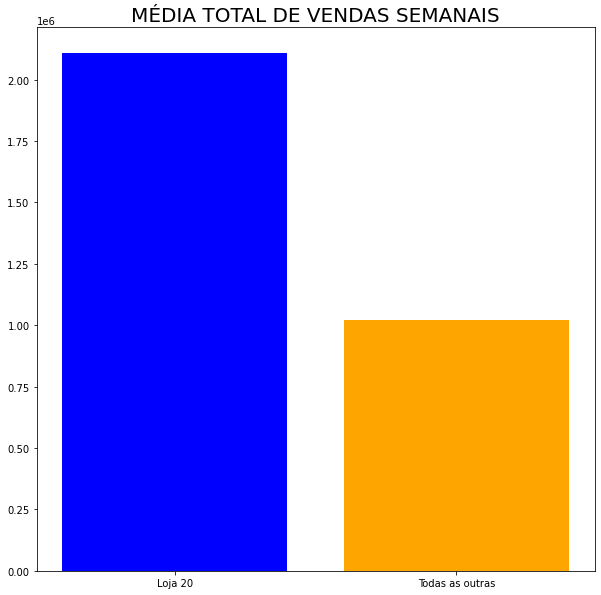

In [36]:
plt.figure(figsize=(10,10))
dados_semStore20 = dados[(dados['Store'] != 20)] # coletando os dados sem a Store 20
y = [store20['Weekly_Sales'].mean(),dados_semStore20['Weekly_Sales'].mean()]
x = ['Loja 20','Todas as outras']
cores = ['blue','orange']
plt.bar(x,y,color=cores)
plt.title('MÉDIA TOTAL DE VENDAS SEMANAIS', size = 20)
plt.show()

In [37]:
#Vemos a média de vendas da Loja 20 bem acima da média geral das demais somadas.

##- DADOS DA STORE 33 

In [38]:
print(f"{store33['Weekly_Sales'].mean()}, média de vendas")
print(f"{store33['Temp Celsius'].mean()}, média de temperatura em Celsius")
print(f"{store33['Fuel_Price'].mean()}, média do preço de combustível")
print(f"{store33['CPI'].mean()}, média de inflação")
print(f"{store33['Unemployment'].mean()}, média de desemprego")

259861.692027972, média de vendas
24.848989898989895, média de temperatura em Celsius
3.5759230769230768, média do preço de combustível
128.67966946083916, média de inflação
8.533153846153846, média de desemprego


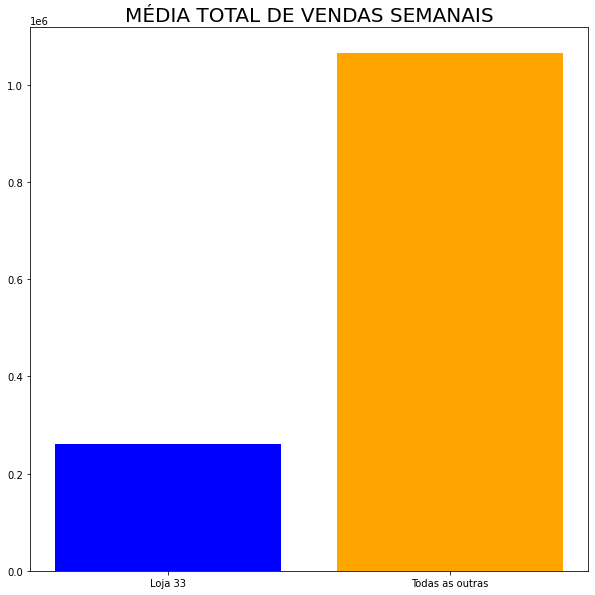

In [39]:
plt.figure(figsize=(10,10))
dados_semStore33 = dados[(dados['Store'] != 33)] # coletando os dados sem a Store 20
y = [store33['Weekly_Sales'].mean(),dados_semStore33['Weekly_Sales'].mean()]
x = ['Loja 33','Todas as outras']
cores = ['blue','orange']
plt.bar(x,y,color=cores)
plt.title('MÉDIA TOTAL DE VENDAS SEMANAIS', size = 20)
plt.show()

## - DADOS DA LOJA 14

In [40]:
print(f"{store14['Weekly_Sales'].mean()}, média de vendas")
print(f"{store14['Temp Celsius'].mean()}, média de temperatura em Celsius")
print(f"{store14['Fuel_Price'].mean()}, média do preço de combustível")
print(f"{store14['CPI'].mean()}, média de inflação")
print(f"{store14['Unemployment'].mean()}, média de desemprego")

2020978.400979021, média de vendas
14.32832167832168, média de temperatura em Celsius
3.4176083916083915, média do preço de combustível
186.28567803776224, média de inflação
8.648748251748252, média de desemprego


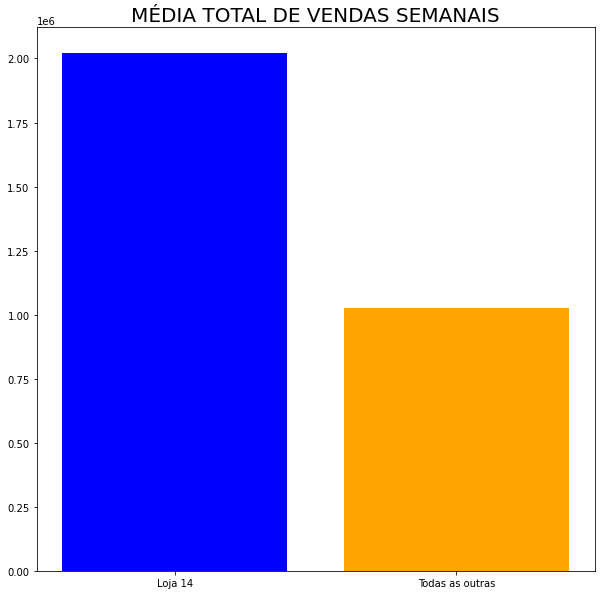

In [41]:
plt.figure(figsize=(10,10))
dados_semStore14 = dados[(dados['Store'] != 14)] 
y = [store14['Weekly_Sales'].mean(),dados_semStore14['Weekly_Sales'].mean()]
x = ['Loja 14','Todas as outras']
cores = ['blue','orange']
plt.bar(x,y,color=cores)
plt.title('MÉDIA TOTAL DE VENDAS SEMANAIS', size = 20)
plt.show()

# Grupamento 4 - Comparações

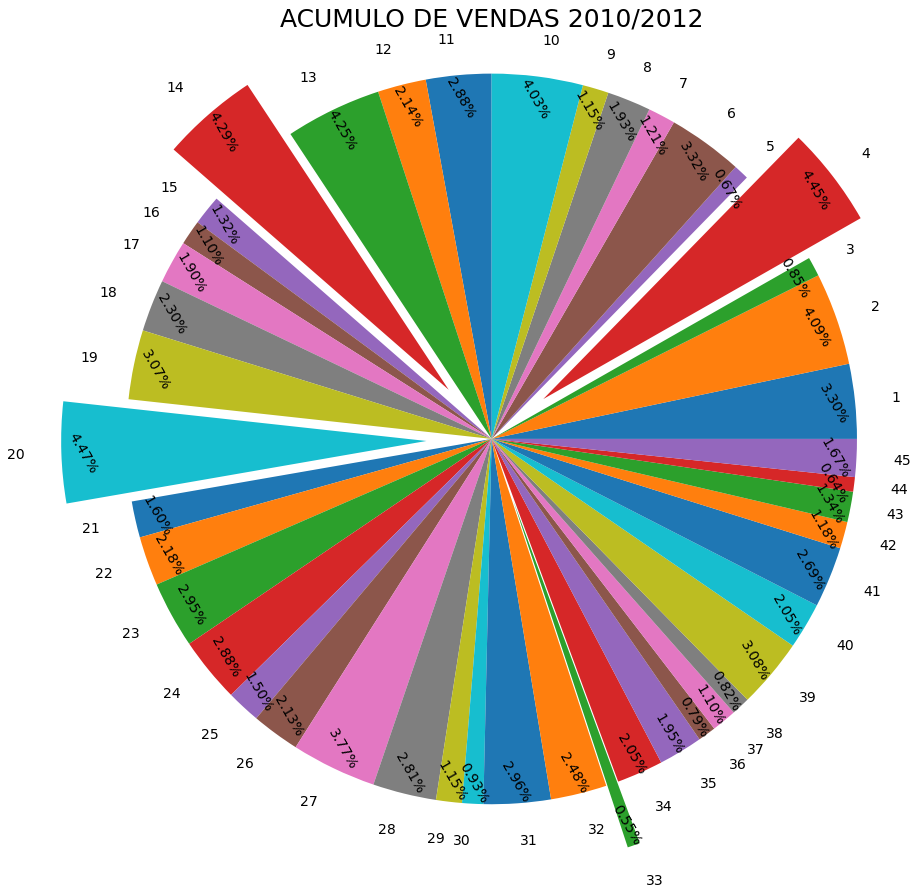

In [42]:
plt.figure(figsize=(20,15))
x = vis['Store']
y = vis['Weekly_Sales']
explode = []

for item in vis['Store']:
  if item == 4 or item == 20 or item == 14 or item == 33:
    explode.append(0.2)
  else:
    explode.append(0)


w,l,p = plt.pie(y,autopct='%.2f%%',pctdistance=0.94,radius=1.12,labels=x,rotatelabels=False,textprops={'fontsize': 14},explode=explode)
[t.set_rotation(300) for t in p]

plt.title('ACUMULO DE VENDAS 2010/2012', fontsize=25)

plt.show()

DESTACANDO AS 3 MAIORES STORES E A PIOR EM ACÚMULO DE VENDAS NO PERÍODO.

## Verificando máximo de venda semanal e do período total por loja

In [43]:
print(f"{store20['Weekly_Sales'].max()}, valor máximo de venda semanal da loja 20")
print(f"{store4['Weekly_Sales'].max()}, valor máximo de venda semanal da loja 4")
print(f"{store14['Weekly_Sales'].max()}, valor máximo de venda semanal da loja 14")
print(f"{store33['Weekly_Sales'].max()}, valor máximo de venda semanal da loja 33")

3766687.43, valor máximo de venda semanal da loja 20
3676388.98, valor máximo de venda semanal da loja 4
3818686.45, valor máximo de venda semanal da loja 14
331173.51, valor máximo de venda semanal da loja 33


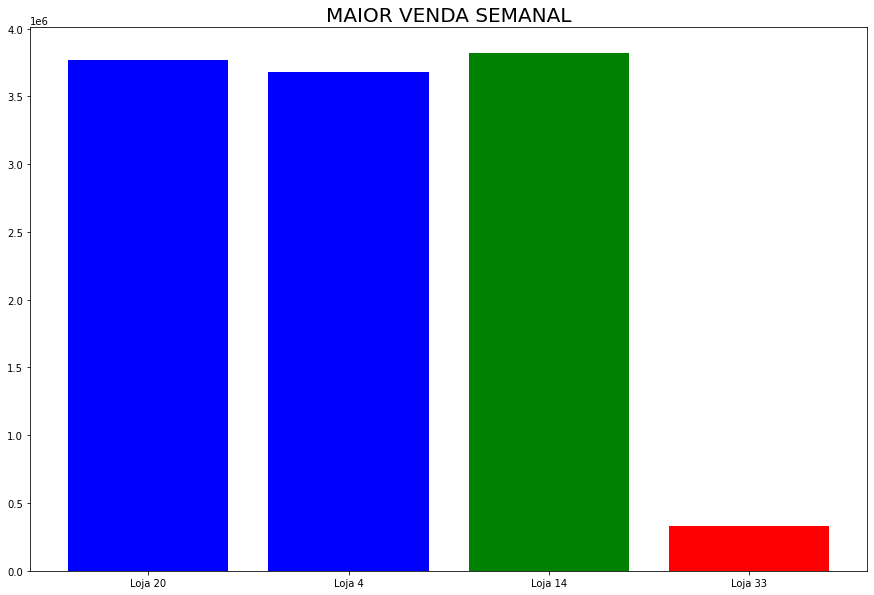

In [44]:
plt.figure(figsize=(15,10))
x = ['Loja 20','Loja 4','Loja 14','Loja 33']
y = [store20['Weekly_Sales'].max(),store4['Weekly_Sales'].max(),store14['Weekly_Sales'].max(),store33['Weekly_Sales'].max()]
cores = ['blue','blue','green','red']

plt.bar(x,y,color = cores )
plt.title('MAIOR VENDA SEMANAL', fontsize=20)
plt.show()

In [45]:
print(f"{store14['Weekly_Sales'].max()} foi a maior venda da Store 14 \n")
print(f"Ocorrida em: \n")
data = store14[(store14['Weekly_Sales'] == store14['Weekly_Sales'].max())]
data['Date']

3818686.45 foi a maior venda da Store 14 

Ocorrida em: 



1905   2010-12-24
Name: Date, dtype: datetime64[ns]

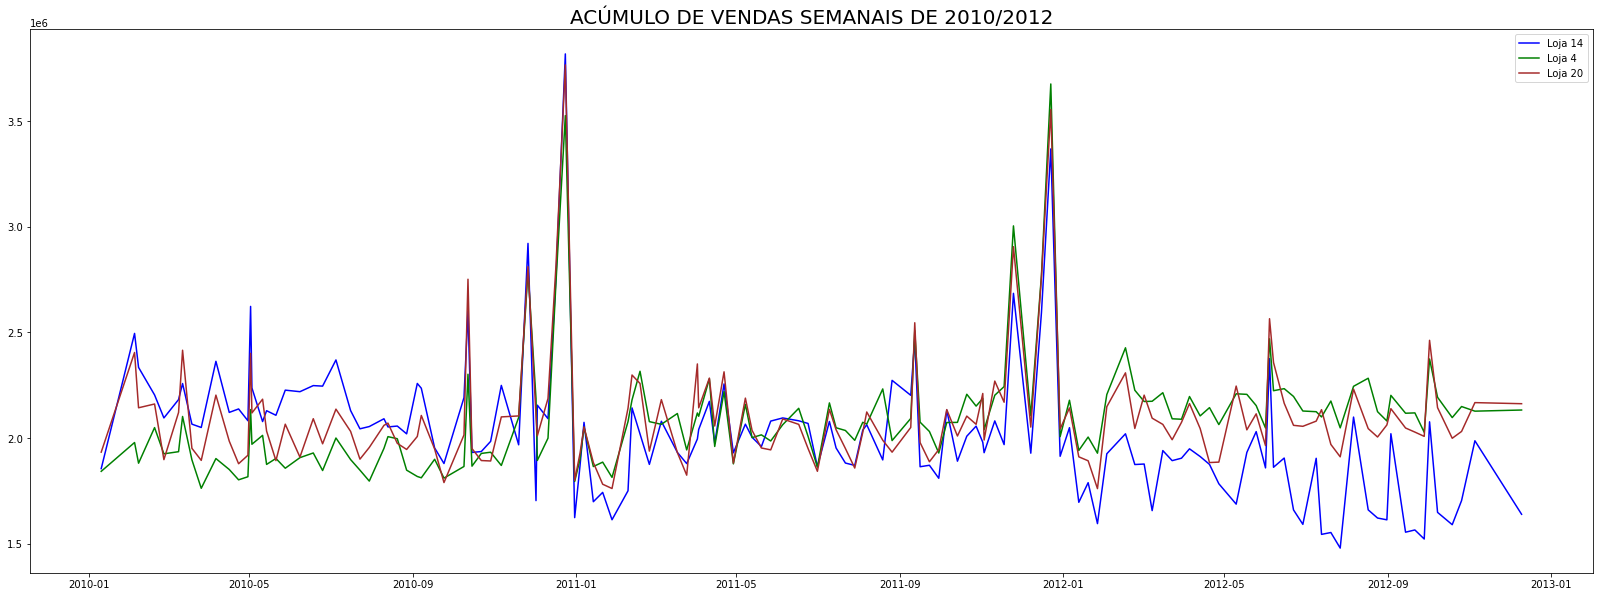

In [46]:
plt.figure(figsize=(28,10))
x = store14['Date']
y = store14['Weekly_Sales'] 
y1 = store4['Weekly_Sales'] 
y2 = store20['Weekly_Sales'] 

plt.plot(x,y,color='blue')
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='brown')
plt.title('ACÚMULO DE VENDAS SEMANAIS DE 2010/2012', size=20)
plt.legend(('Loja 14','Loja 4','Loja 20'))

OS MAIORES PICOS ESTÃO NOS FERIADOS.

In [47]:
store14['Weekly_Sales'].max()

3818686.45

In [48]:
store14[(store14['Weekly_Sales'] == 3818686.45)] # A SEMANA QUE MAIS VENDEU, VÉSPERA DE NATAL DE 2010 NA LOJA 14.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius,Mean_Sales
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724,-0.783333,2020978.0


VEMOS QUE NO PERÍODO, A MAIOR VENDA SEMANAL FOI NA LOJA 14, NA VÉSPERA DO FERIADO DE NATAL de 2010.

In [49]:
print(f"{store20['Weekly_Sales'].sum().round()}, é número total de vendas da loja 20")
print(f"{store4['Weekly_Sales'].sum().round()}, é número total de vendas da loja 4")
print(f"{store14['Weekly_Sales'].sum().round()}, é número total de vendas da loja 14")
print(f"{store33['Weekly_Sales'].sum().round()}, é número total de vendas da loja 33")

301397792.0, é número total de vendas da loja 20
299543953.0, é número total de vendas da loja 4
288999911.0, é número total de vendas da loja 14
37160222.0, é número total de vendas da loja 33


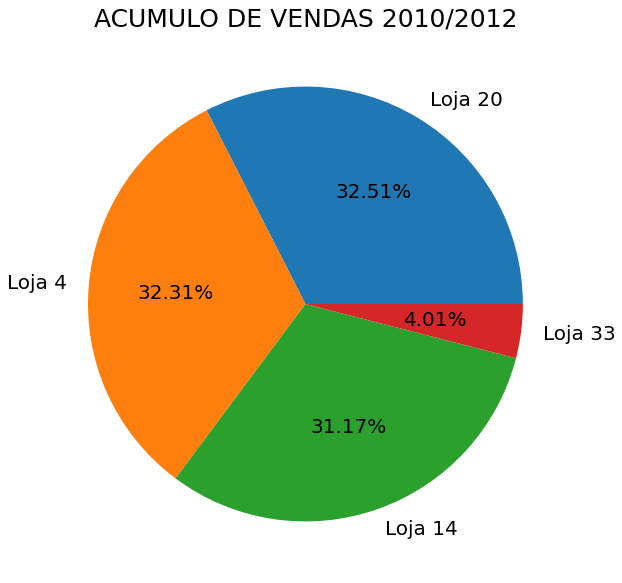

In [50]:
plt.figure(figsize=(15,10))
x = ['Loja 20','Loja 4','Loja 14','Loja 33']
y = [store20['Weekly_Sales'].sum(),store4['Weekly_Sales'].sum(),store14['Weekly_Sales'].sum(),store33['Weekly_Sales'].sum()]

plt.pie(y,autopct='%.2f%%',labels=x,textprops={'fontsize': 20})
plt.title('ACUMULO DE VENDAS 2010/2012', fontsize=25)

plt.show()

VEMOS QUE EMBORA A LOJA 14 TENHA OBTIDO A MAIOR VENDA EM UMA SEMANA, A LOJA 20 POSSUI O MAIOR ACÚMULO TOTAL DE VENDAS AO LONGO DE TODO O PERÍODO.

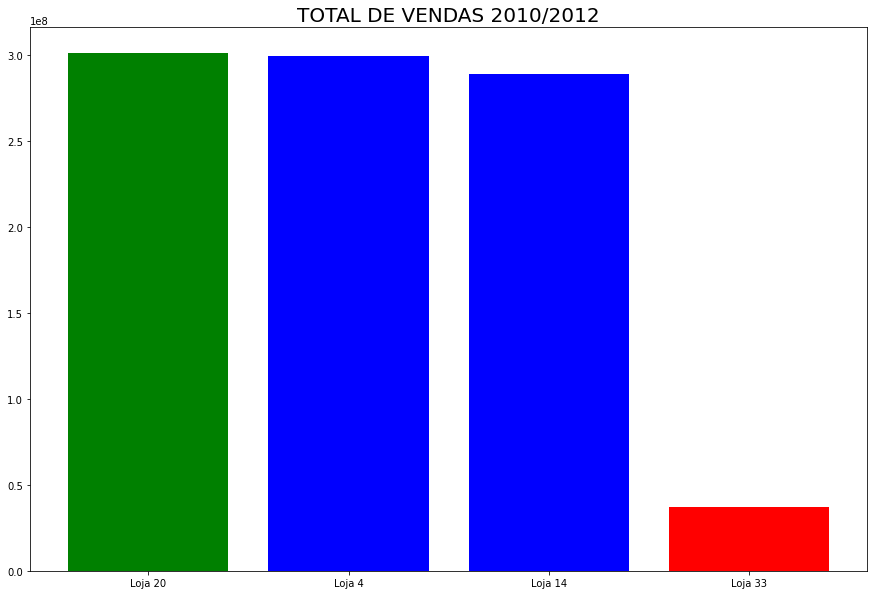

In [51]:
plt.figure(figsize=(15,10))
x = ['Loja 20','Loja 4','Loja 14','Loja 33']
y = [store20['Weekly_Sales'].sum(),store4['Weekly_Sales'].sum(),store14['Weekly_Sales'].sum(),store33['Weekly_Sales'].sum()]
cores = ['green','blue','blue','red']

plt.bar(x,y,color = cores )
plt.title('TOTAL DE VENDAS 2010/2012', fontsize=20)
plt.show()


DETECTAMOS QUE A LOJA 20 É A QUE POSSUI O MELHOR DESEMPENHO EM VENDAS AO LONGO DE TODO O PERÍODO ANALISADO.


In [52]:
print(f"{store20['CPI'].mean().round()}, valor médio de inflação da loja 20")
print(f"{store4['CPI'].mean().round()}, valor médio de inflação da loja 4")
print(f"{store14['CPI'].mean().round()}, valor médio de inflação da loja 14")
print(f"{store33['CPI'].mean().round()}, valor médio de inflação da loja 33")


209.0, valor médio de inflação da loja 20
129.0, valor médio de inflação da loja 4
186.0, valor médio de inflação da loja 14
129.0, valor médio de inflação da loja 33


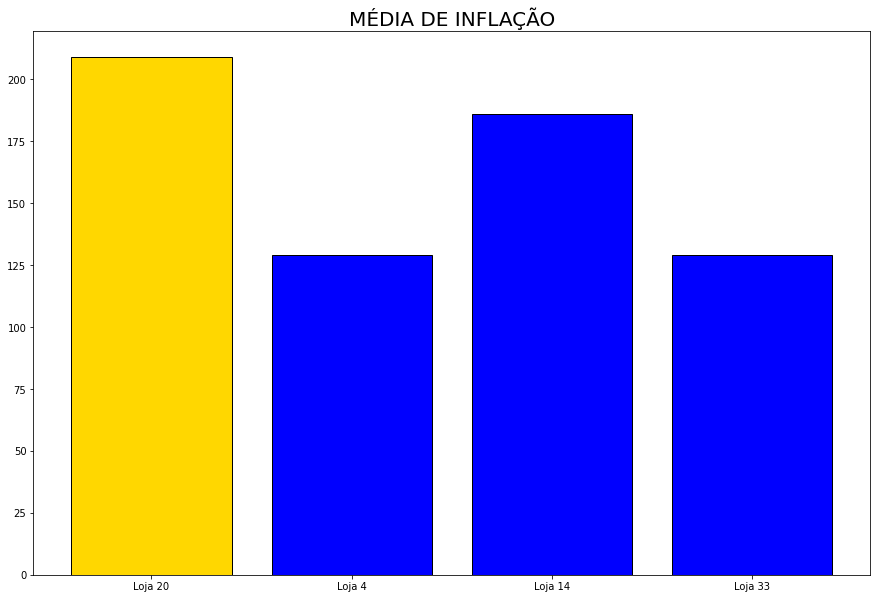

In [53]:
plt.figure(figsize=(15,10))
x = ['Loja 20','Loja 4','Loja 14','Loja 33']
y = [store20['CPI'].mean().round(),store4['CPI'].mean().round(),store14['CPI'].mean().round(),store33['CPI'].mean().round()]
cores = ['gold','blue','blue','blue']

plt.bar(x,y,color = cores, edgecolor = 'black' )
plt.title('MÉDIA DE INFLAÇÃO', fontsize=20)
plt.show()

NOTAMOS QUE A REGIÃO DA LOJA 20 POSSUI A MÉDIA DE INFLAÇÃO MAIS ALTA DENTRE AS DEMAIS.

EM UM CONTEXTO ONDE A LOJA EXECUTA O MAIOR NÚMERO DE VENDAS, ISSO INDICA A POSSIBILIDADE DE UMA INFLAÇÃO SAUDÁVEL NA REGIÃO, DEMONSTRANDO UMA ÁREA COM BOM MOVIMENTO DE CAPITAL, ATIVIDADE ECONÔMICA AQUECIDA, E TAMBÉM, POSSIVELMENTE, UMA ÁREA NOBRE.

A SEGUNDA MAIOR EM VENDAS, LOJA 4, ESTÁ COM A MÉDIA DE INFLAÇÃO MAIS BAIXA, PORÉM A QUANTIDADE DE VENDAS É DE APENAS 0.62% MENOR COMPARADA A LOJA 20.

In [54]:
print(f"{store20['Weekly_Sales'].sum().round() - store4['Weekly_Sales'].sum().round()} de vendas, é a diferença no total acumulado entre a loja 20 e a loja 4")

1853839.0 de vendas, é a diferença no total acumulado entre a loja 20 e a loja 4


In [55]:
print(f" Que equivale a {((store20['Weekly_Sales'].sum().round() - store4['Weekly_Sales'].sum().round()) * 100) / store20['Weekly_Sales'].sum().round():.2f}% das vendas da loja 20")

 Que equivale a 0.62% das vendas da loja 20


PODEMOS PENSAR QUE, CASO SEJA LEVADO EM CONTA A INFLAÇÃO DA REGIÃO NO CUSTO DA EXPANSÃO, PODE HAVER A OPORTUNIDADE DE EXPANSÃO MAIS BARATA E COM POTENCIAL DE ALTO NÚMERO DE VENDAS NA LOJA 4, QUE POR ENQUANTO, É NOSSA SEGUNDA MELHOR EM VENDAS, COM POUCA DISTÂNCIA DA PRIMEIRA.

CASO NÃO HAJA INTERFERÊNCIA DA INFLAÇÃO DA REGIÃO NA EXPANSÃO DA LOJA, A LOJA 20 SERIA POSSIVELMENTE A MELHOR INDICADA, PORÉM, VAMOS COMPARAR AINDA ALGUMAS INFORMAÇÕES PARA FUNDAMENTAR QUAL POSSUI A MELHOR OPORTUNIDADE.

In [56]:
#uma região mais ativa economicamente, pela inflação mais alta.
#ou seja, o valor de combustivel não atrapalharia nossa expansão.
#região que o desemprego é o mais estável

##  Comparando as vendas

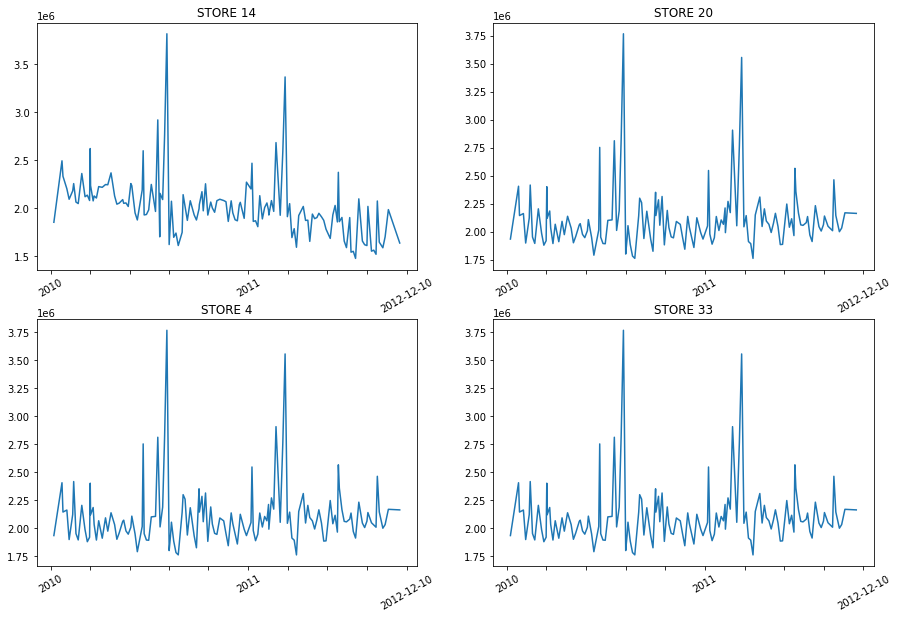

In [57]:
#comparando desempenho das vendas

x = store14['Date']
y = store14['Weekly_Sales'].round() 
y1 = store20['Weekly_Sales']
y2 = store4['Weekly_Sales']
y3 = store33['Weekly_Sales']


figure, axis = plt.subplots(2, 2,figsize=(15,10)) 
axis[0,0].plot(x,y)
axis[0, 0].set_title("STORE 14") 
axis[0, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012-12-10'),rotation=30)

# axis[0, 0].set_yticklabels(labels=('','',store14['Weekly_Sales'].min().round(),'',store14['Weekly_Sales'].mean().round(),store14['Weekly_Sales'].max().round()))
# axis[0, 0].set_ylim(store14['Weekly_Sales'].min().round(),store14['Weekly_Sales'].max().round())


axis[0,1].plot(x,y1)
axis[0, 1].set_title("STORE 20") 
axis[0, 1].set_xticklabels(labels=('2010','','','','','2011','','','',"2012-12-10"),rotation=30)

axis[1,0].plot(x,y1)
axis[1, 0].set_title("STORE 4") 
axis[1, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012-12-10'),rotation=30)

axis[1,1].plot(x,y1)
axis[1, 1].set_title("STORE 33") 
axis[1, 1].set_xticklabels(labels=('2010','','','','','2011','','','','2012-12-10'),rotation=30)


plt.show()

VERIFICAMOS OS DESEMPENHOS DE VENDAS SEMANAIS AO LONGO DO PERÍODO.

FICA NÍTIDO A TENDÊNCIA DE QUEDA DA STORE 14, ENQUANTO AS DEMAIS SEGUEM UMA LINHA ESTABILIZADA DENTRO DO PADRÃO DE VENDAS.

In [58]:
print('VALORES ANUAIS INDIVIDUAIS')

print('STORE 14 - 2010 a 2012')
vendas14_10 = store14[(store14['Date'].dt.year == 2010)]
vendas14_11 = store14[(store14['Date'].dt.year == 2011)]
vendas14_12 = store14[(store14['Date'].dt.year == 2012)]
print(vendas14_10['Weekly_Sales'].sum(),vendas14_11['Weekly_Sales'].sum(),vendas14_12['Weekly_Sales'].sum())

print('STORE 20 - 2010 a 2012')
vendas20_10 = store20[(store20['Date'].dt.year == 2010)]
vendas20_11 = store20[(store20['Date'].dt.year == 2011)]
vendas20_12 = store20[(store20['Date'].dt.year == 2012)]
print(vendas20_10['Weekly_Sales'].sum(),vendas20_11['Weekly_Sales'].sum(),vendas20_12['Weekly_Sales'].sum())

print('STORE 4 - 2010 a 2012')
vendas4_10 = store4[(store4['Date'].dt.year == 2010)]
vendas4_11 = store4[(store4['Date'].dt.year == 2011)]
vendas4_12 = store4[(store4['Date'].dt.year == 2012)]
print(vendas4_10['Weekly_Sales'].sum(),vendas4_11['Weekly_Sales'].sum(),vendas4_12['Weekly_Sales'].sum())



VALORES ANUAIS INDIVIDUAIS
STORE 14 - 2010 a 2012
105462242.38 106096270.69999999 77441398.26
STORE 20 - 2010 a 2012
101733080.72 109837002.36000001 89827709.38
STORE 4 - 2010 a 2012
95680470.81 111092293.33 92771189.23999998


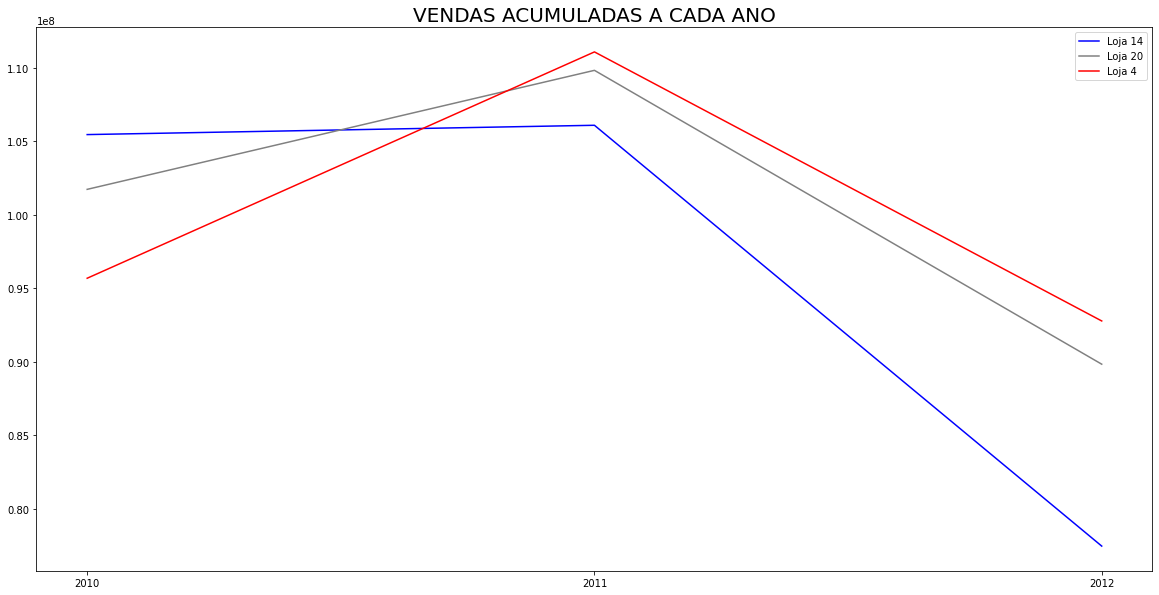

In [59]:
plt.figure(figsize=(20,10))

x = [2010,2011,2012]
y = [vendas14_10['Weekly_Sales'].sum(),vendas14_11['Weekly_Sales'].sum(),vendas14_12['Weekly_Sales'].sum()]
y1 = [vendas20_10['Weekly_Sales'].sum(),vendas20_11['Weekly_Sales'].sum(),vendas20_12['Weekly_Sales'].sum()]
y2 = [vendas4_10['Weekly_Sales'].sum(),vendas4_11['Weekly_Sales'].sum(),vendas4_12['Weekly_Sales'].sum()] 

plt.plot(x,y,color='blue')
plt.plot(x,y1,color='gray')
plt.plot(x,y2,color='red')
plt.legend(('Loja 14','Loja 20','Loja 4'))


plt.title('VENDAS ACUMULADAS A CADA ANO', size=20)
plt.xticks((2010,2011,2012))

plt.show()

VEMOS QUE A LOJA QUE MAIS TEM CRESCIDO EM TOTAL DE VENDAS, É A LOJA 4.
EMBORA A LOJA 20 TENHA O MAIOR ACUMULADO DO PERÍODO, A LOJA 4 VEM CRESCENDO MAIS DO QUE A 20, E CHEGOU A SUPERAR A LOJA 20 EM VENDAS ANUAL A PARTIR DE 2011, AUMENTADO A DISTÂNCIA EM 2012.

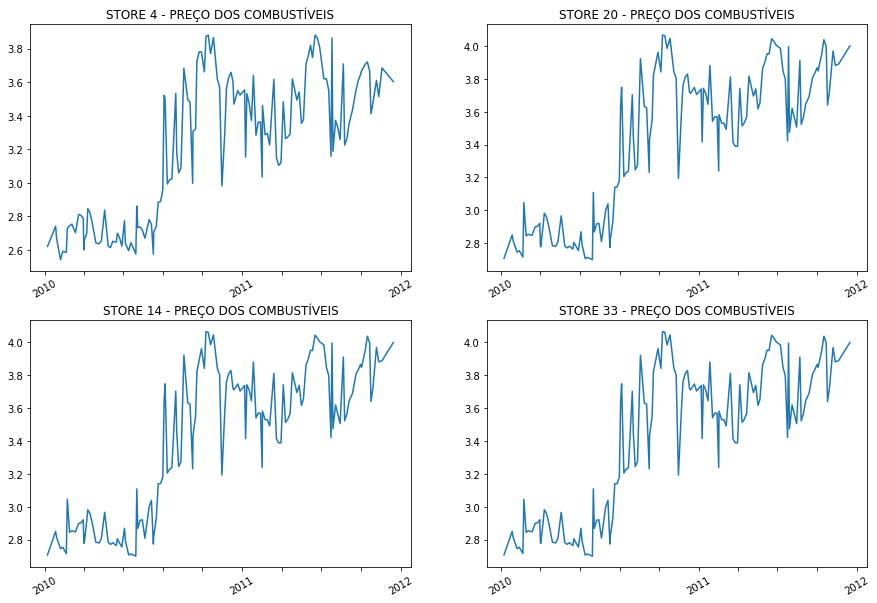

In [60]:
#comparando desenrolar dos preços dos combustiveis

x = store14['Date']
y = store4['Fuel_Price'] 
y1 = store20['Fuel_Price']
y2 = store14['Fuel_Price']
y3 = store33['Fuel_Price']


figure, axis = plt.subplots(2, 2,figsize=(15,10)) 

axis[0,0].plot(x,y)
axis[0, 0].set_title("STORE 4 - PREÇO DOS COMBUSTÍVEIS") 
axis[0, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)


axis[0,1].plot(x,y1)
axis[0, 1].set_title("STORE 20 - PREÇO DOS COMBUSTÍVEIS") 
axis[0, 1].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)

axis[1,0].plot(x,y1)
axis[1, 0].set_title("STORE 14 - PREÇO DOS COMBUSTÍVEIS") 
axis[1, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)

axis[1,1].plot(x,y1)
axis[1, 1].set_title("STORE 33 - PREÇO DOS COMBUSTÍVEIS") 
axis[1, 1].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)

plt.show()


In [61]:
print(f"Preço máximo do combustivel na STORE 4: {store4['Fuel_Price'].max()}")
print(f"Preço máximo do combustivel na STORE 20: {store20['Fuel_Price'].max()}")
print(f"Preço máximo do combustivel na STORE 14: {store14['Fuel_Price'].max()}")
print(f"Preço máximo do combustivel na STORE 33: {store33['Fuel_Price'].max()}")

Preço máximo do combustivel na STORE 4: 3.881
Preço máximo do combustivel na STORE 20: 4.066
Preço máximo do combustivel na STORE 14: 4.066
Preço máximo do combustivel na STORE 33: 4.468


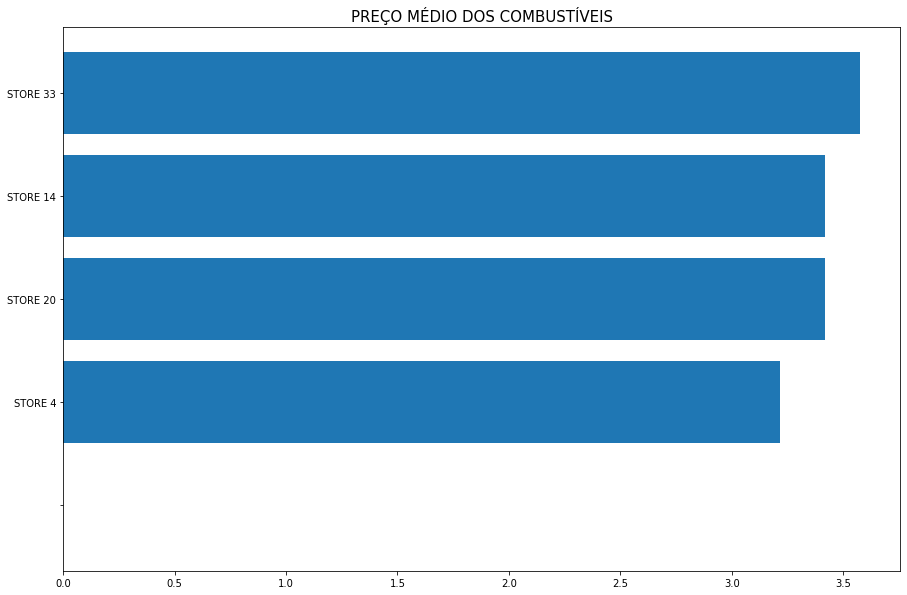

In [62]:
plt.figure(figsize=(15,10))

y = [0,store4['Fuel_Price'].mean(),store20['Fuel_Price'].mean(),store14['Fuel_Price'].mean(),store33['Fuel_Price'].mean()]
x = ['','STORE 4','STORE 20','STORE 14','STORE 33']

plt.title('PREÇO MÉDIO DOS COMBUSTÍVEIS',size=15)
plt.barh(x,y)

plt.show()

NOTAMOS QUE OS PREÇOS DO COMBUSTÍVEL FORAM MUITO SEMELHANTES EM SUA OSCILAÇÃO AO LONGO DO PERÍODO, PORÉM A LOJA 4, QUE ALÉM DE TER SOFRIDO UMA LEVE QUEDA DE PREÇOS NO FINAL DO PERÍODO, AINDA POSSUI A MÉDIA DE PREÇOS MAIS BAIXA, SENDO O LOCAL COM COMBUSTÍVEL MAIS BARATO.

O VALOR MÁXIMO QUE O COMBUSTÍVEL ATINGIU EM SUA REGIÃO, FOI 3.88

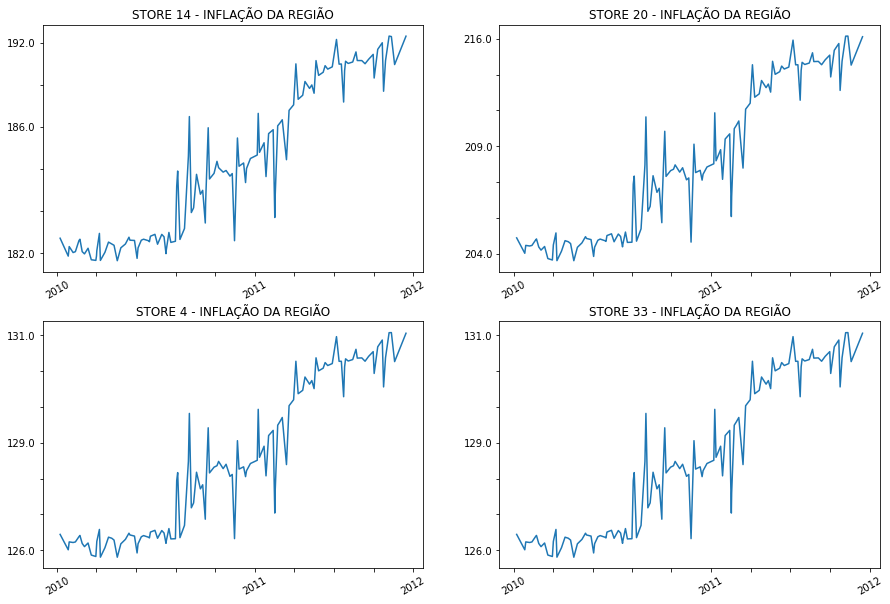

In [63]:
#comparando desenrolar da inflação

x = store14['Date']
y = store14['CPI'] 
y1 = store20['CPI']
y2 = store4['CPI']
y3 = store33['CPI']


figure, axis = plt.subplots(2, 2,figsize=(15,10)) 
axis[0,0].plot(x,y)
axis[0, 0].set_title("STORE 14 - INFLAÇÃO DA REGIÃO") 
axis[0, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[0, 0].set_yticklabels(labels=('',store14['CPI'].min().round(),'','',store14['CPI'].mean().round(),'',store14['CPI'].max().round()))

axis[0,1].plot(x,y1)
axis[0, 1].set_title("STORE 20 - INFLAÇÃO DA REGIÃO") 
axis[0, 1].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[0, 1].set_yticklabels(labels=('',store20['CPI'].min().round(),'','',store20['CPI'].mean().round(),'','',store20['CPI'].max().round()))

axis[1,0].plot(x,y1)
axis[1, 0].set_title("STORE 4 - INFLAÇÃO DA REGIÃO") 
axis[1, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[1, 0].set_yticklabels(labels=('',store4['CPI'].min().round(),'','',store4['CPI'].mean().round(),'','',store4['CPI'].max().round()))

axis[1,1].plot(x,y1)
axis[1, 1].set_title("STORE 33 - INFLAÇÃO DA REGIÃO") 
axis[1, 1].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[1, 1].set_yticklabels(labels=('',store33['CPI'].min().round(),'','',store33['CPI'].mean().round(),'','',store33['CPI'].max().round()))


plt.show()

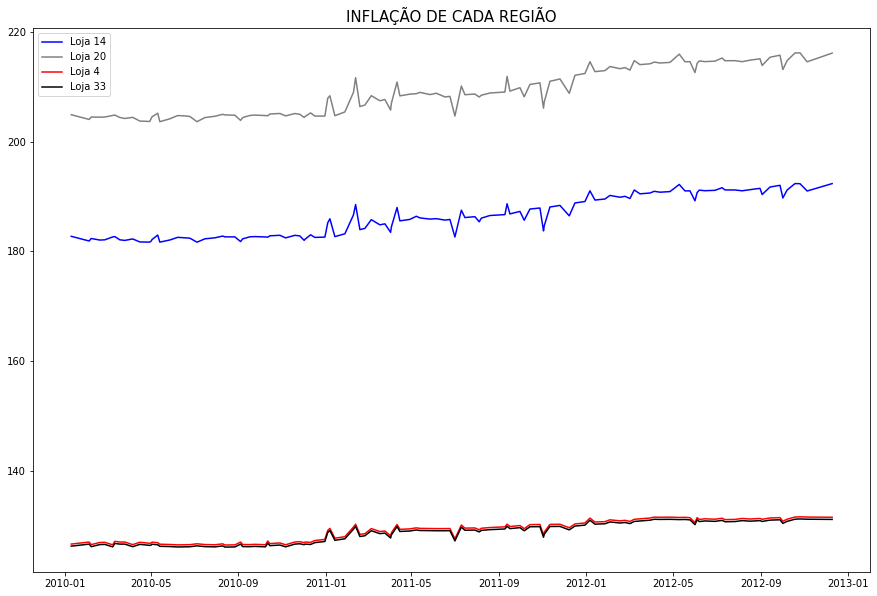

In [64]:
plt.figure(figsize=(15,10))

x = store14['Date']
y = store14['CPI'] 
y1 = store20['CPI']
y2 = store4['CPI']*1.003
y3 = store33['CPI']


plt.title('INFLAÇÃO DE CADA REGIÃO',size=15)
plt.plot(x,y,color='blue')
plt.plot(x,y1,color='gray')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='black')
plt.legend(('Loja 14','Loja 20','Loja 4','Loja 33'))

plt.show()

NOTAMOS QUE AS INFLAÇÕES SUBIRAM SIMULTANEAMENTE, ENTRETANTO, ATINGIRAM MÁXIMAS DISTINTAS, SENDO A MENOR CONSTATADA NA REGIÃO DA STORE 4.
INCLUSIVE, VALE OBSERVAR QUE A INFLAÇÃO DA REGIÃO DA LOJA 4 É IGUAL A INFLAÇÃO DA LOJA MAIS FRACA, LOGO, A LOJA 4 VENDE MAIS QUE A LOJA 20 COM A INFLAÇÃO DA LOJA QUE POSSUI MENOR DEMANDA.


COM ISSO, SABEMOS QUE OS PRODUTOS DA STORE 4 SÃO MAIS ATRATIVOS POR SEREM MAIS BARATOS, O QUE INDICARIA A POSSÍVEL RAZÃO DO CRESCIMENTO MAIS FORTE COMPARADO AO DAS DEMAIS EM VENDAS.

In [65]:
print(f" Pico máximo de inflação das lojas: Store 14 - {store14['CPI'].max():.2f}, Store 4 - {store4['CPI'].max():.2f},  Store 33 - {store33['CPI'].max():.2f}, Store 20 - {store20['CPI'].max():.2f}")

 Pico máximo de inflação das lojas: Store 14 - 192.33, Store 4 - 131.19,  Store 33 - 131.19, Store 20 - 216.15


In [66]:
print(f"Nível máximo de desocupação na STORE 4: {store4['Unemployment'].max()}")
print(f"Nível máximo de desocupação na STORE 20: {store20['Unemployment'].max()}")
print(f"Nível máximo de desocupação na STORE 14: {store14['Unemployment'].max()}")
print(f"Nível máximo de desocupação na STORE 33: {store33['Unemployment'].max()}")

Nível máximo de desocupação na STORE 4: 8.623
Nível máximo de desocupação na STORE 20: 8.187
Nível máximo de desocupação na STORE 14: 8.992
Nível máximo de desocupação na STORE 33: 10.115


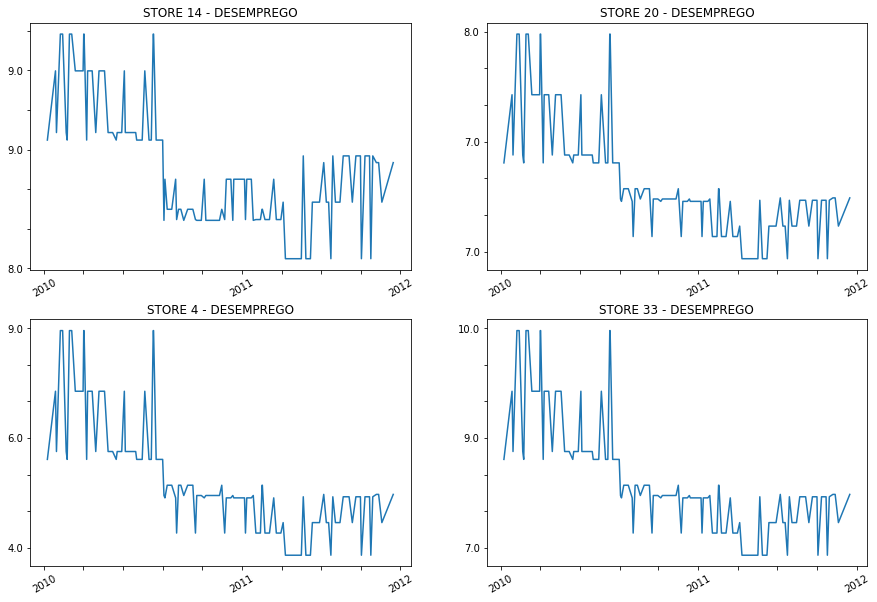

In [67]:
#comparando desenrolar do desemprego

x = store14['Date']
y = store14['Unemployment'] 
y1 = store20['Unemployment']
y2 = store4['Unemployment']
y3 = store33['Unemployment']


figure, axis = plt.subplots(2, 2,figsize=(15,10)) 
axis[0,0].plot(x,y)
axis[0, 0].set_title("STORE 14 - DESEMPREGO") 
axis[0, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[0, 0].set_yticklabels(labels=('',store14['Unemployment'].min().round(),'','',store14['Unemployment'].mean().round(),'',store14['Unemployment'].max().round()))

axis[0,1].plot(x,y1)
axis[0, 1].set_title("STORE 20 - DESEMPREGO") 
axis[0, 1].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[0, 1].set_yticklabels(labels=('',store20['Unemployment'].min().round(),'','',store20['Unemployment'].mean().round(),'','',store20['Unemployment'].max().round()))

axis[1,0].plot(x,y1)
axis[1, 0].set_title("STORE 4 - DESEMPREGO") 
axis[1, 0].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[1, 0].set_yticklabels(labels=('',store4['Unemployment'].min().round(),'','',store4['Unemployment'].mean().round(),'','',store4['Unemployment'].max().round()))

axis[1,1].plot(x,y1)
axis[1, 1].set_title("STORE 33 - DESEMPREGO") 
axis[1, 1].set_xticklabels(labels=('2010','','','','','2011','','','','2012'),rotation=30)
axis[1, 1].set_yticklabels(labels=('',store33['Unemployment'].min().round(),'','',store33['Unemployment'].mean().round(),'','',store33['Unemployment'].max().round()))


plt.show()

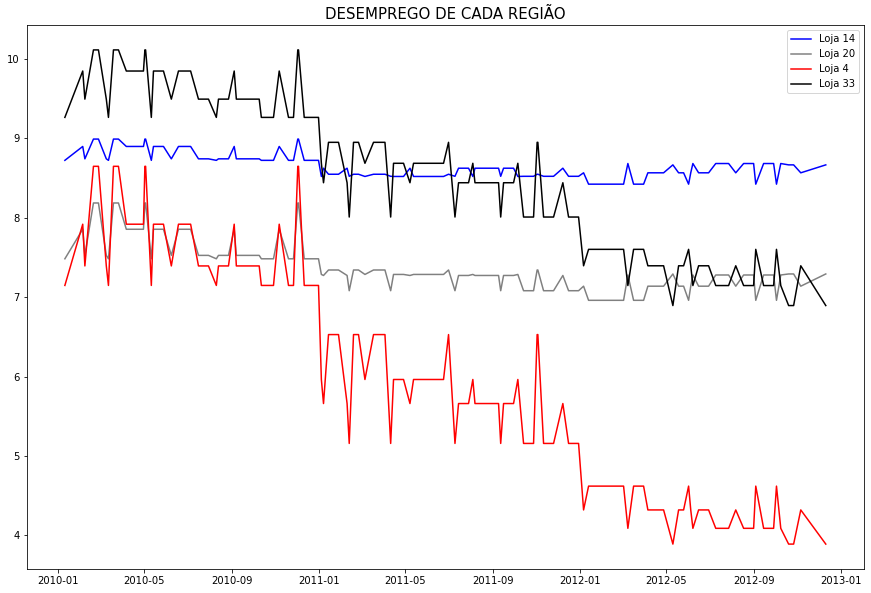

In [68]:
plt.figure(figsize=(15,10))

x = store14['Date']
y = store14['Unemployment'] 
y1 = store20['Unemployment']
y2 = store4['Unemployment']*1.003
y3 = store33['Unemployment']


plt.title('DESEMPREGO DE CADA REGIÃO',size=15)
plt.plot(x,y,color='blue')
plt.plot(x,y1,color='gray')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='black')
plt.legend(('Loja 14','Loja 20','Loja 4','Loja 33'))

plt.show()

NOTAMOS QUE HOUVE MELHORA NA SITUAÇÃO DE DESEMPREGO SIMULTANEAMENTE EM TODAS AS REGIÕES, ENTRETANTO, A REGIÃO DA LOJA 4 É A QUE POSSUI A MAIOR QUEDA, DEMONSTRANDO UMA REGIÃO QUE POSSUI MAIS ATIVIDADE ECONÔMICA.

In [69]:
#DIFERENÇA DA LOJA 4 PARA A LOJA 20.

print(f"A média de vendas da loja 4 é de {(store4['Weekly_Sales'].mean() * 100 )/ store20['Weekly_Sales'].mean():.2f}% da média de vendas da Loja 20")
print(f"O preço médio do combustível da loja 4 é {(store4['Fuel_Price'].mean() * 100 )/ store20['Fuel_Price'].mean() - 100:.2f}% menor do que o preço médio da Loja 20")
print(f"A média de inflação da loja 4 é apenas {(store4['CPI'].mean() * 100 )/ store20['CPI'].mean():.2f}% da inflação média da Loja 20")
print(f"A média de desemprego da loja 4 é {(store4['Unemployment'].mean() * 100 )/ store20['Unemployment'].mean() - 100:.2f}% menor do que na Loja 20")
print()


A média de vendas da loja 4 é de 99.38% da média de vendas da Loja 20
O preço médio do combustível da loja 4 é -5.87% menor do que o preço médio da Loja 20
A média de inflação da loja 4 é apenas 61.56% da inflação média da Loja 20
A média de desemprego da loja 4 é -19.08% menor do que na Loja 20



#Grupamento 5 - Verificando correlações

In [70]:
corr = dados.corr() #verifiquei as correlações entre todas as lojas
corr.round()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
Store,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
Weekly_Sales,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
Holiday_Flag,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0
Temperature,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,1.0
Fuel_Price,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0
CPI,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0
Unemployment,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Temp Celsius,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp Celsius
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-0.022659
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-0.063810
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-0.155091
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,1.000000
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,0.144982
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,0.176888
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,0.101158
Temp Celsius,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,1.000000


In [72]:
np.corrcoef(dados['Unemployment'],dados['Weekly_Sales']) [0,1] #verificando correlação entre desemprego e vendas

-0.10617608965795429

VEMOS QUE AS CORRELAÇÕES SÃO INDIFERENTES.

#Grupamento 6 - Conclusão e indicação da STORE escolhida.

**As análise e tratamentos realizados, portanto, indica essa STORE para expansão, com base nos seguintes critérios:**

1. Primeiramente verifiquei o total acumulado de vendas de todo o período, onde constatei que a STORE 20 é a que mais possui vendas.

1. Em seguida, realizei o levantamento dos totais de cada STORE, para fins de comparação, ano a ano, onde foi possível notar as três melhores e a pior, sendo respectivamente a STORE 20, STORE 4, STORE 14 E STORE 33.
Nesta análise, foi possível notar, que embora a STORE 20 tivesse o maior acúmulo de vendas, nitidamente a STORE 4 a estava superando nas vendas anuais a partir de 2011, ampliando a distância em 2012.

1. Foi analisado também, a inflação, preço dos combustiveis e nível de desocupação, e notei que a STORE 4 possui a inflação mais baixa, preço do combustível mais baixo e desemprego mais baixo, todos os sintomas de desenvolvimento e atividade econômica pujante na região, além da própria superação em vendas anuais.

1. Visando então a ampliação onde as vendas são altas e a economia demonstra força e crescimento, a STORE 4 se torna a mais atraente, inclusive, caso seja levado em conta o CUSTO da expansão, a inflação baixa da região pode nos favorecer.

1. **COM ISSO, A CONCLUSÃO E INDICAÇÃO É QUE A EXPANSÃO OCORRA NA STORE 4**

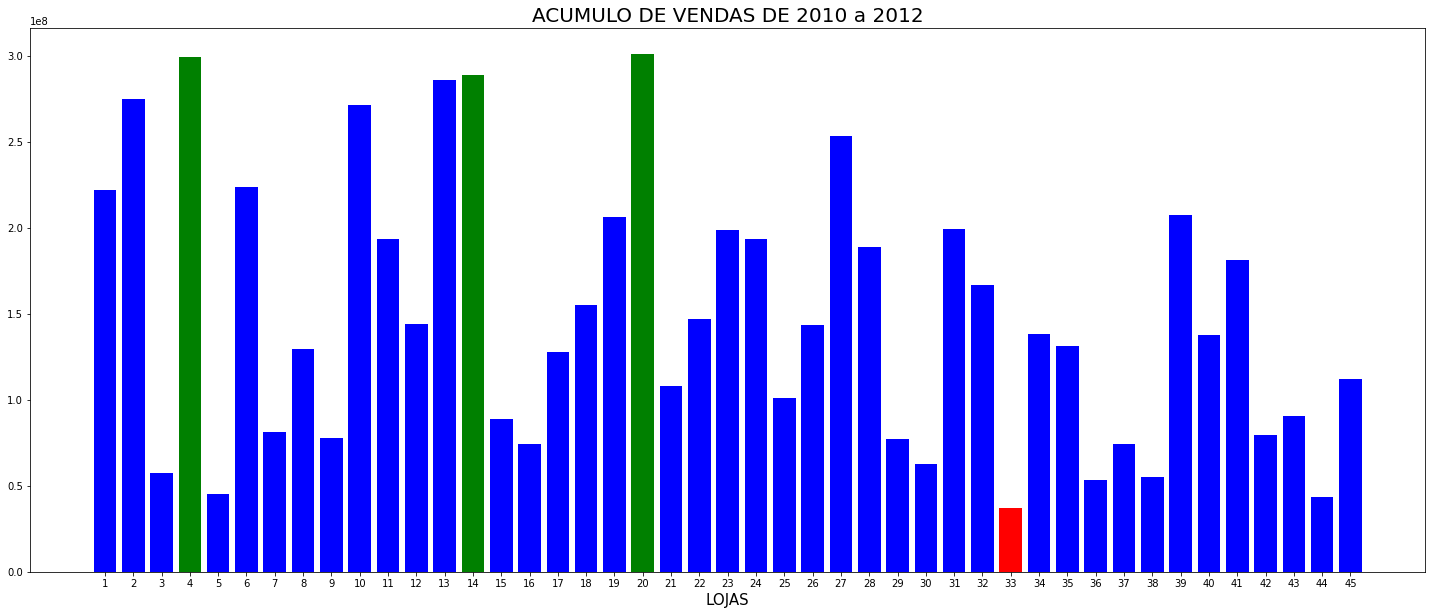

In [73]:
# 1.
plt.figure(figsize=(25,10))
x = vis['Store']
y = vis['Weekly_Sales']
cores = ['b','b','b','g','b','b','b','b','b','b','b','b','b','g','b','b','b','b','b','g','b','b','b','b','b','b','b','b','b','b','b','b','r','b','b','b','b','b','b','b','b','b','b','b','b','b',]

plt.bar(x, y,color=cores)
plt.xticks(np.arange(1,46))
plt.title('ACUMULO DE VENDAS DE 2010 a 2012', size=20)
plt.xlabel('LOJAS',size=15)
plt.show()

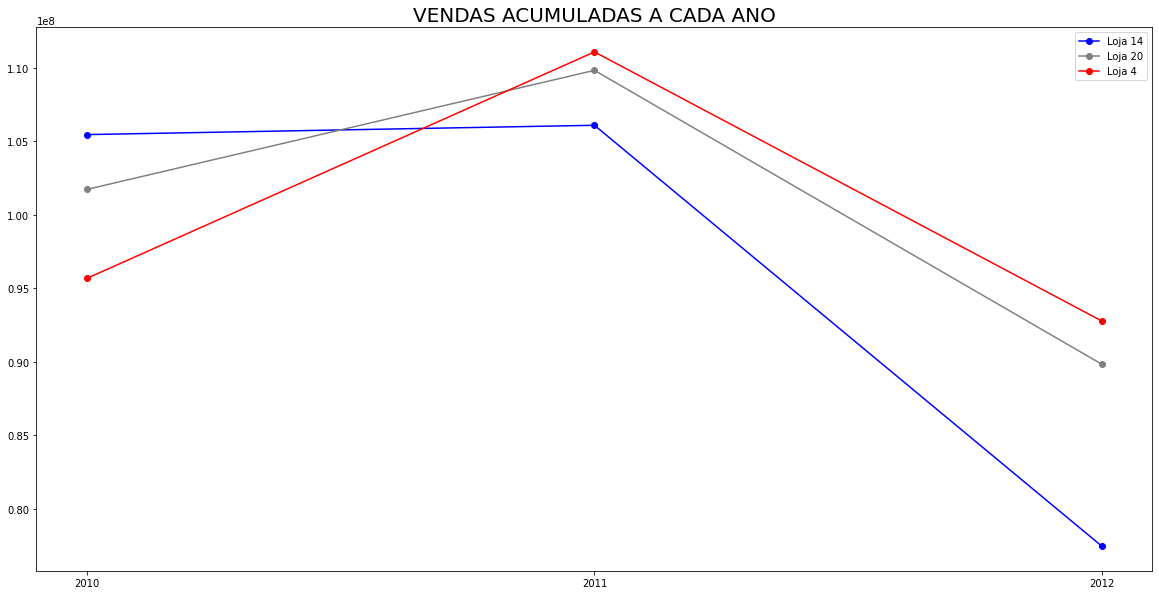

In [74]:
# 2.
plt.figure(figsize=(20,10))

x = [2010,2011,2012]
y = [vendas14_10['Weekly_Sales'].sum(),vendas14_11['Weekly_Sales'].sum(),vendas14_12['Weekly_Sales'].sum()]
y1 = [vendas20_10['Weekly_Sales'].sum(),vendas20_11['Weekly_Sales'].sum(),vendas20_12['Weekly_Sales'].sum()]
y2 = [vendas4_10['Weekly_Sales'].sum(),vendas4_11['Weekly_Sales'].sum(),vendas4_12['Weekly_Sales'].sum()] 

plt.plot(x,y,color='blue', marker = 'o')
plt.plot(x,y1,color='gray', marker = 'o')
plt.plot(x,y2,color='red', marker = 'o')
plt.legend(('Loja 14','Loja 20','Loja 4'))


plt.title('VENDAS ACUMULADAS A CADA ANO', size=20)
plt.xticks((2010,2011,2012))

plt.show()

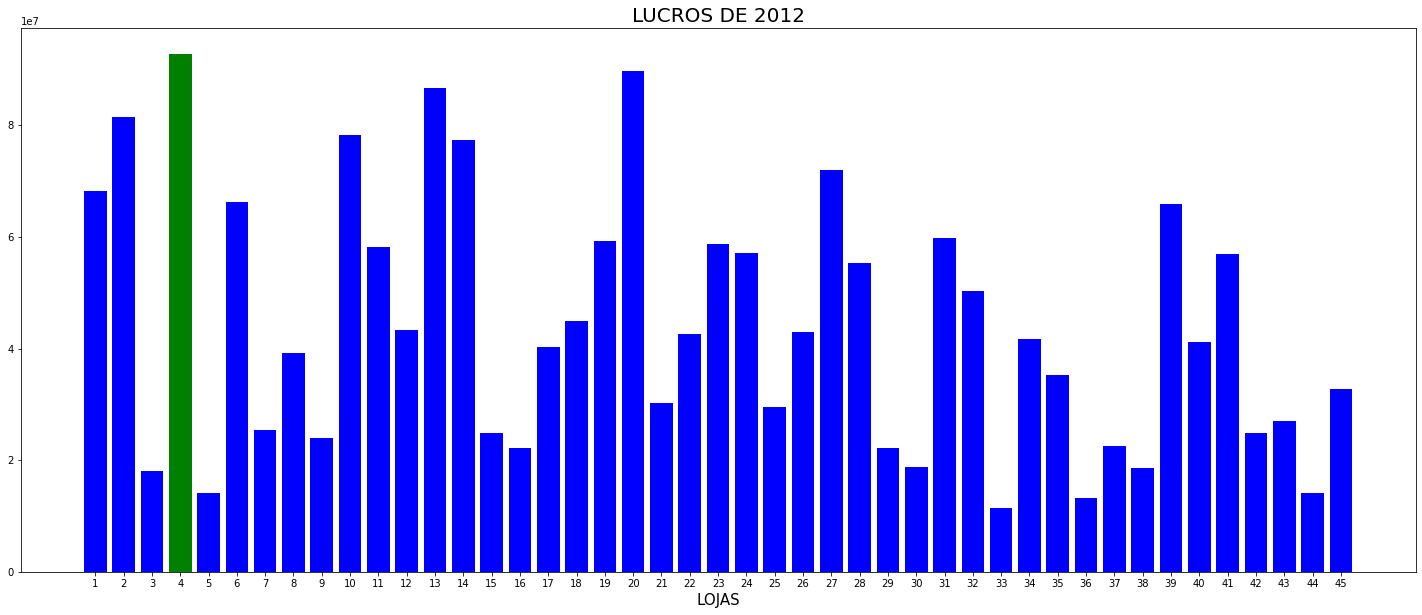

In [75]:
dois_doze = vis_a[(vis_a['Date'] == 2012)]

plt.figure(figsize=(25,10))
x = dois_doze['Store']
y = dois_doze['Weekly_Sales']
cores = ['b','b','b','g','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b',]

plt.bar(x, y,color=cores)
plt.xticks(np.arange(1,46))
plt.title('LUCROS DE 2012', size=20)
plt.xlabel('LOJAS',size=15)
plt.show()

In [76]:
# 3. TODAS AS INFORMAÇÕES NO GRUPAMENTO 4.

In [99]:
total4 = store4[(store4['Date'].dt.year == 2012)]
quatro_2012 = total4['Weekly_Sales'].sum().round()

In [101]:
total20 = store20[(store20['Date'].dt.year == 2012)]
vinte_2012 = total20['Weekly_Sales'].sum().round()

In [104]:
dif = quatro_2012 - vinte_2012
dif

2943480.0

In [109]:
print(f" O desempenho da Loja 4 só no ano de 2012 foi de {((dif * 100) / vinte_2012):.2f}% a mais do que da Loja 20, vindo de uma alta cada vez mais forte, ano a ano.")

 O desempenho da Loja 4 só no ano de 2012 foi de 3.28% a mais do que da Loja 20, vindo de uma alta cada vez mais forte.


**STORE 4 INDICADA PARA EXPANSÃO**